## Project Title: Clusterogram – Unsupervised Learning on Airline Tweets

## Description:
Clusterogram is an unsupervised machine learning project that applies clustering algorithms to real-world social media data. Using tweet data from airline passengers, the project aims to identify hidden groupings or sentiment-based clusters within the dataset without using labeled outcomes.

The project performs advanced text preprocessing, vectorization (TF-IDF), and applies KMeans and Agglomerative Clustering to extract meaningful patterns. Dimensionality reduction techniques like PCA are used to visualize the cluster structure, and silhouette scores are used to evaluate clustering performance.

## 🎯 Objectives:
Discover natural groupings in tweet data based on airline and sentiment

Evaluate and compare clustering performance using silhouette scores

Explore high-dimensional NLP data in a fully unsupervised way

Learn the trade-offs between Elbow vs Silhouette in cluster selection

## Key Features:
1. ✅ Real-world dataset: Airline tweets from customers

2. 🧹 Data cleaning & preprocessing (text, missing values)

3. ✏️ TF-IDF vectorization for natural language features

4. 📊 Standardization & Label Encoding of non-text features

5. 📉 Dimensionality Reduction using PCA

6. 🔗 Implemented KMeans and Agglomerative Clustering

7. 📈 Used Elbow Method & Silhouette Score for cluster evaluation

8. 🎨 Visualized clusters in 2D using PCA scatter plots



In [1]:
import pandas as pd
import zipfile

## IMPORTING CSV DATA FILE IN ZIP FOLDER

In [2]:
# to import a csv file
# df = pd.read_csv('file_name')
# I am using zip extraction method to extract data
zip_path = r"C:\Users\Harsh Sharma\Downloads\Tweets.csv.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the ZIP
    print("Tweets.csv.zip loaded:")
    print(zip_ref.namelist())  # <-- Look at this output to find the exact CSV name

    # Use the exact CSV filename from the list
    csv_file_name = 'Tweets.csv'  # <-- Replace with the actual CSV name inside ZIP

    # Read CSV from ZIP without extracting
    with zip_ref.open(csv_file_name) as f:
        df = pd.read_csv(f)
        print(df.head(3))

Tweets.csv.zip loaded:
['Tweets.csv']
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn 

In [3]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
df.info

<bound method DataFrame.info of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereas

In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## Cleaning of Data from the Dataset

In [7]:
df['airline'] = df['airline'].fillna(df['airline'].mode(0))
df['text'] = df['text'].fillna(df['text'].mode(0))

## Removal of Special terms in Dataset

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# example cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # remove links, mentions, hashtags
    text = re.sub(r"\W+", " ", text.lower())  # remove special characters
    return text

## TfidfVectorizer : Converts text data into numerical features using the TF-IDF method (Term Frequency-Inverse Document Frequency).

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = tfidf.fit_transform(df['text'])

## Standard Scale:Similar Scalling of Features

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_retweets = scaler.fit_transform(df[['retweet_count']])
# Step 2: Prepare retweets (must be reshaped for stacking)
X_retweets = df['retweet_count'].values.reshape(-1, 1)

## Use of LabelEncoder to Give specific Labels of text value of Column Airline

In [45]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix

le = LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])

X_airline_sparse = csr_matrix(df['airline'].values.reshape(-1, 1))

## Test and Train Split With Combinations of Features

In [46]:
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
import numpy as np



# Step 3: Combine all features into a sparse matrix
X_final = hstack([X_text, X_airline_sparse, X_retweets])

# Step 4: Train/Test Split
X_train, X_test = train_test_split(X_final, test_size=0.2, random_state=42)

In [47]:
X_final.shape

(14640, 5002)

## Algorithms Used
This project doesn't rely on a single algorithm — it takes a professional approach by applying and comparing three different unsupervised clustering techniques:
| Algorithm                                        | Purpose / Strength                                             |
| ------------------------------------------------ | -------------------------------------------------------------- |
| 🔹 **KMeans Clustering**                         | Fast and effective for spherical clusters                      |
| 🔸 **Hierarchical Clustering (Agglomerative)**   | Useful for visualizing nested structure (dendrograms)          |
| 🔻 **DBSCAN (Density-Based Spatial Clustering)** | Best for irregular, non-spherical clusters and noise detection |


## Mannual way to find value of k

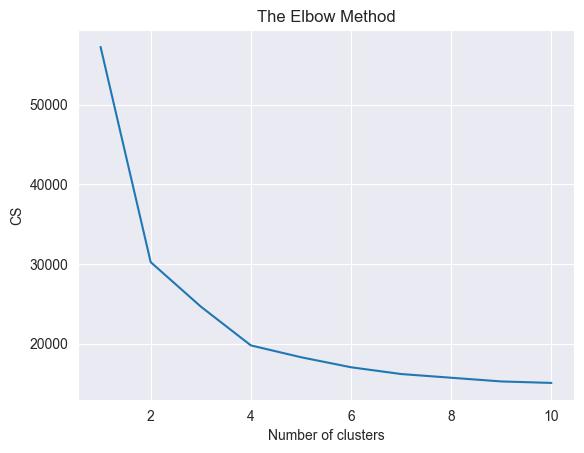

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_final)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

 ## Applying DBSCAN(density based-Clustering) Model

In [70]:
from sklearn.cluster import DBSCAN
ROOT  = DBSCAN(eps=0.5)

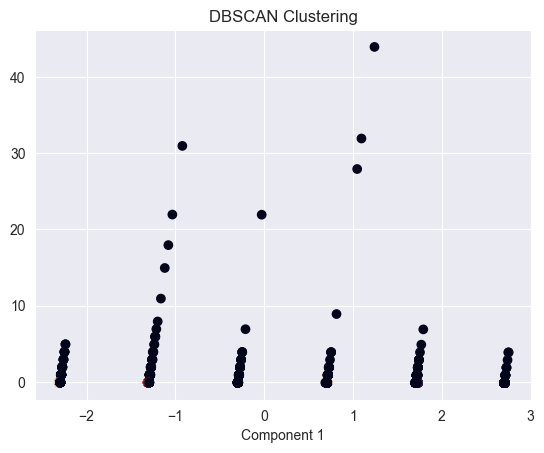

In [71]:
from sklearn.decomposition import PCA

X_dense = X_final.toarray()
labels = ROOT.fit_predict(X_dense)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_dense)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.xlabel('Component 1')
plt.show()

## Silhouette score

In [72]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_dense, labels)
print(score)

-0.4329103276235422


## Hierarchical Clustering:
 Agglomerative clustering


In [49]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2)

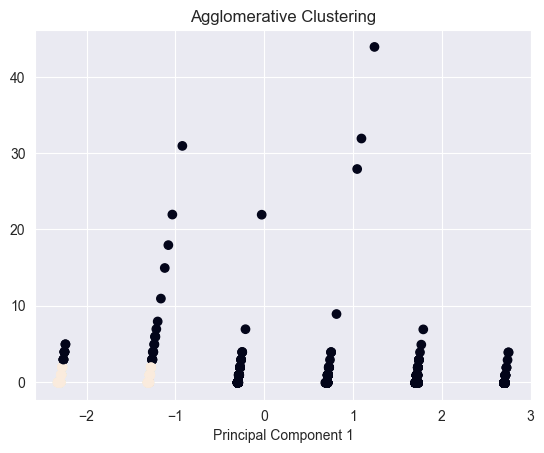

In [50]:
from sklearn.decomposition import PCA

X_dense  = X_final.toarray()

ag_labels = ag.fit_predict(X_dense)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_dense)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = ag.labels_)
plt.title("Agglomerative Clustering")
plt.xlabel('Principal Component 1')
plt.show()

## Silhouette Score Measures:

In [52]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Step 1: True labels (must be encoded to integers first`)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

# Step 2: Predict clusters
ag = AgglomerativeClustering(n_clusters=2)
ag_labels = ag.fit_predict(X_dense)


In [53]:
score = silhouette_score(X_final , ag_labels, metric='euclidean', sample_size=None, random_state=0)

In [54]:
score

np.float64(0.40903157205473173)

## Finding Value of K for Kmean Cluster

In [56]:
from kneed import KneeLocator
kl = KneeLocator( range(1,11) , cs  ,curve='convex' , direction = 'decreasing')
kl.elbow

np.int64(4)

| Method         | Suggests | Based On               | Why the Conflict?                                              |
| -------------- | -------- | ---------------------- | -------------------------------------------------------------- |
| **Elbow**      | K = 4    | Inertia (compactness)  | More clusters = lower inertia — not always meaningful clusters |
| **Silhouette** | K = 2    | Separation & tightness | Fewer clusters = more distinct boundaries                      |


## KMean clustering

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,init='k-means++', max_iter=300, n_init=10,random_state=23)
labels = kmeans.fit_predict(X_final)


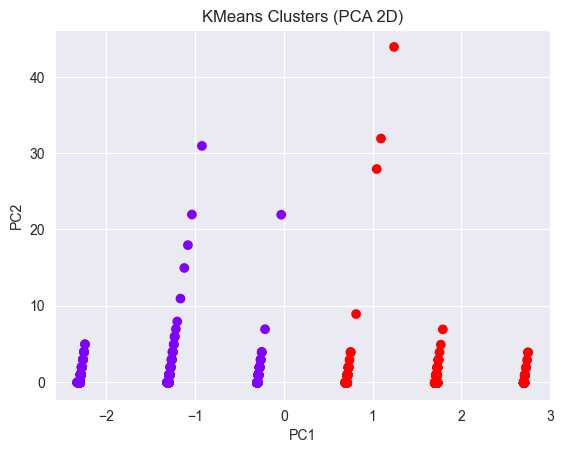

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_dense = X_final.toarray()
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_dense)

plt.scatter(X_pca[:,0] , X_pca[:,1] , c= labels , cmap = 'rainbow')
plt.title('KMeans Clusters (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Cluster Centers

In [59]:
kmeans.cluster_centers_

array([[4.49892267e-04, 6.11262985e-04, 0.00000000e+00, ...,
        1.07520956e-04, 9.54195379e-01, 6.94500743e-02],
       [2.26749573e-04, 8.77143610e-04, 1.26363981e-04, ...,
        1.52290271e-04, 3.66721923e+00, 9.61458765e-02]], shape=(2, 5002))

In [60]:
kmeans.inertia_

30237.370567257152

## Testing of data

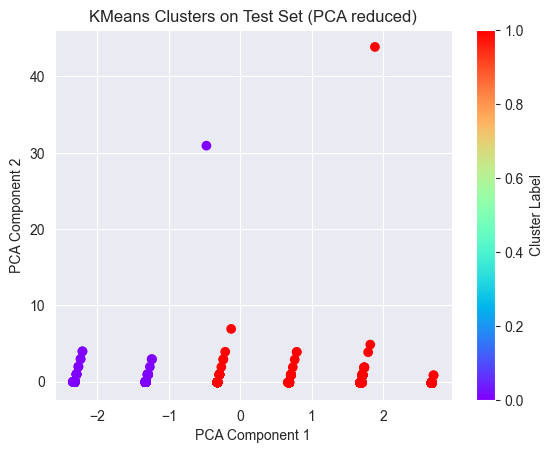

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit KMeans on training data
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_test)
test_labels = kmeans.predict(X_test)


X_test_dense = X_test.toarray()
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_test_dense)

plt.scatter(X_pca[:,0] , X_pca[:,1] , c= test_labels , cmap = 'rainbow')
plt.title("KMeans Clusters on Test Set (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


## Training of model

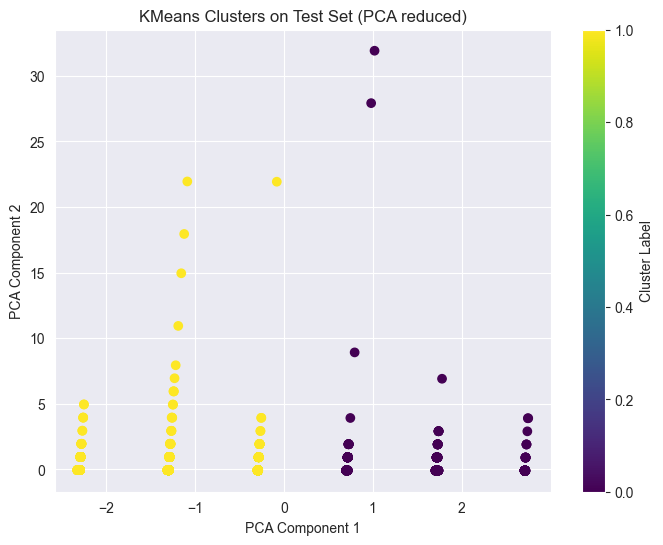

In [62]:
kmeans.fit(X_train)

# Predict clusters on test data
w_labels = kmeans.predict(X_train)

# Reduce X_test for visualization using PCA
X_train_dense = X_train.toarray()  # Convert sparse matrix to dense
X_train_pca = PCA(n_components=2).fit_transform(X_train_dense)

# Plot the test data with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=w_labels, cmap='viridis')
plt.title("KMeans Clusters on Test Set (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


## Checking Silhouette score

In [65]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_final , labels, metric='euclidean', sample_size=None, random_state=0)

In [66]:
score

np.float64(0.4151949046045152)

## 1️⃣ What Elbow Method Measures:
It looks at inertia (within-cluster sum of squares) — i.e., how compact the clusters are.

Elbow/knee is the point where adding more clusters doesn’t significantly reduce inertia.

So, it finds the “efficient” number of clusters based on distance minimization — not separation quality.

## 2️⃣ What Silhouette Score Measures:
It looks at how well-separated and tight the clusters are.

It compares:

Distance of a point to its own cluster center (a)

Distance to the nearest other cluster (b)

Higher silhouette = better separation and compactness

In [67]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_final)
    score = silhouette_score(X_final, labels)
    print(f"K={k} → Silhouette Score = {score:.3f}")


K=2 → Silhouette Score = 0.415
K=3 → Silhouette Score = 0.249
K=4 → Silhouette Score = 0.214
K=5 → Silhouette Score = 0.215
K=6 → Silhouette Score = 0.188
K=7 → Silhouette Score = 0.190
K=8 → Silhouette Score = 0.192
K=9 → Silhouette Score = 0.141
K=10 → Silhouette Score = 0.150


## Tech Stack:

| Task                     | Tools Used                                    |
| ------------------------ | --------------------------------------------- |
| Language                 | Python                                        |
| Data Handling            | `pandas`, `numpy`                             |
| Text Processing          | `nltk`, `re`, `TF-IDF`                        |
| Clustering Algorithms    | `KMeans`, `AgglomerativeClustering`, `DBSCAN` |
| Dimensionality Reduction | `PCA`                                         |
| Evaluation Metrics       | `Silhouette Score`, `Inertia`, `Elbow`        |
| Visualization            | `matplotlib`, `seaborn`                       |


## 📊 Results Summary:

- **Best Silhouette Score:** Achieved with **K=2 in KMeans**: `0.415`
- **Agglomerative Clustering Score:** ~`0.409`
- **DBSCAN:** Tested with tuned `eps` and `min_samples` — useful for non-spherical clusters, but silhouette score was **-0.432**
- **Elbow Method** suggested **K=4**, but **Silhouette Score** revealed better structure at **K=2**
- ✅ All results are visualized using **PCA-based scatter plots** for better interpretation

